In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch

In [2]:
data = pd.read_table('BODA.MPRA.txt',sep=' ', header=0)

In [3]:
data

,ID,Class,K562.DNase,HepG2.DNase,SKNSH.DNase,K562,HepG2,SKNSH,HepG2.neon,nt.sequence
1,1:1000010:NA:NA,K27_Cluster,NaN,NaN,NaN,-0.378778,-0.046075,-0.328164,-0.091570,NaN
2,1:10003180:NA:NA,K27_Cluster,NaN,NaN,NaN,1.615062,0.411107,1.227331,1.232792,NaN
3,1:100232000:NA:NA,K27_Cluster,NaN,NaN,NaN,-0.541293,-0.124916,-0.351485,-0.744768,NaN
4,1:100435632:NA:NA,K27_Cluster,NaN,NaN,NaN,2.761731,0.994067,2.007800,2.537400,NaN
5,1:1004619:NA:NA,K27_Cluster,NaN,NaN,NaN,4.458458,0.844679,2.892215,2.717508,NaN
...,...,...,...,...,...,...,...,...,...,...
29987,Y:2692689:NA:NA,DHS_Uniq,NaN,NaN,NaN,-0.710793,1.006190,-0.001079,3.101087,TAGCCAGGCTTGCTTATTCTGCTTGCCTGCAGAAGTTTACGAAGCC...
29988,Y:2693555:NA:NA,K27_Uniq,NaN,NaN,NaN,0.407247,0.274533,0.492778,0.559042,GAGTGAAACTCCGCCTCAAAAAAATAAAATAAAATAAAATAAAAGA...
29989,Y:2693755:NA:NA,K27_Uniq,NaN,NaN,NaN,-0.084666,0.354539,-0.296401,0.011810,TAACTTAAATAACATATGCATGTTTTTTGATACTTCGAATTATGCA...
29990,Y:2693955:NA:NA,K27_Uniq,NaN,NaN,NaN,-0.576660,-0.479418,-0.668815,-0.464715,TATGCAAAAATTAATGAAGAGACAGTTATACTACACCTCATGTAAT...


In [4]:
for a_class in data['Class'].unique():
    print(f'Class {a_class} has {sum(data["Class"] == a_class)} items.')

Class K27_Cluster has 1630 items.
Class K27_Uniq has 7512 items.
Class DHS_Uniq has 3750 items.
Class PosCtrl has 91 items.
Class NegCtrl has 506 items.
Class K27_All has 1002 items.
Class DHS_All has 500 items.
Class BODA has 15000 items.


In [5]:
data['SKNSH'].std()

1.0848508536096855

In [6]:
data['K562.norm'] = (data['K562'] - data['K562'].mean()) / data['K562'].std()
data['HepG2.norm'] = (data['HepG2'] - data['HepG2'].mean()) / data['HepG2'].std()
data['SKNSH.norm'] = (data['SKNSH'] - data['SKNSH'].mean()) / data['SKNSH'].std()

In [7]:
prob = torch.tensor( data.loc[:,['K562.norm', 'HepG2.norm','SKNSH.norm']].values ).softmax(1)
logp = prob.log()

sent = (prob * logp).sum(1).mul(-1)
data['entropy'] = sent.cpu().numpy()

In [8]:
data.loc[:,('K562.norm','entropy')]

,K562.norm,entropy
1,-0.650699,1.091493
2,0.845779,1.088813
3,-0.772675,1.094177
4,1.706413,1.096073
5,2.979892,0.932982
...,...,...
29987,-0.899893,0.567910
29988,-0.060747,1.090337
29989,-0.429953,0.993789
29990,-0.799220,1.081941


In [9]:
only_dhs_or_boda = data.loc[ (data['Class'] == 'BODA') | (data['Class'] == 'DHS_Uniq') | (data['Class'] == 'DHS_All') ]
only_dhs_or_boda = pd.concat([
    data.loc[ (data['Class'] == 'BODA') ],
    data.loc[ (data['Class'] == 'DHS_Uniq') ],
    data.loc[ (data['Class'] == 'DHS_All') ]
])

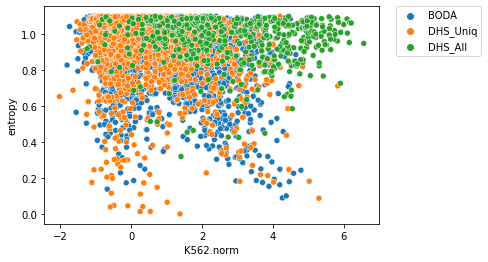

In [31]:
sns.scatterplot(data=only_dhs_or_boda.loc[:,('K562.norm','entropy','Class')],x='K562.norm',y='entropy',hue='Class')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

No handles with labels found to put in legend.


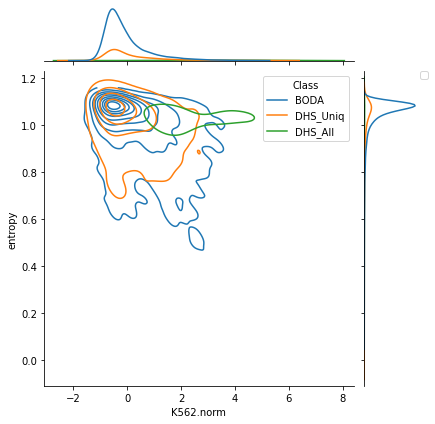

In [32]:
sns.jointplot(data=only_dhs_or_boda.loc[:,('K562.norm','entropy','Class')],x='K562.norm',y='entropy',hue='Class',kind='kde')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [12]:
passes = only_dhs_or_boda[ (only_dhs_or_boda['K562'] > 2.0) & (only_dhs_or_boda['entropy'] < 0.4) ]
for a_class in passes['Class'].unique():
    print(f'Class {a_class} has {sum(passes["Class"] == a_class)} items.')

Class BODA has 42 items.
Class DHS_Uniq has 20 items.
Class DHS_All has 1 items.


In [13]:
for i, seq in enumerate(passes.loc[passes["Class"] == 'BODA','nt.sequence']):
    print(f'> boda_seq_{i+1}')
    print(seq)

> boda_seq_1
TAGAATAATTTTTCGGGCGATATAGGTGGTGTCTGCAATGGTGTTCAAGTGAGATAAGTCAGATCGTCAGGAAAAGAAAGTCGGGCGGTCCCGTGGACCTTTATCTCCCTGTGTGAATAGCAGGCTCTGGCTAGCTAATGCAAAGGAATATGTGTAATCGTTATATAGGTCCAGGTGTTATCGGACTGAACATGATGTGT
> boda_seq_2
GGACAAAGTCTCTCGGGCAACTCTTGTGTGCGATATACCCAGGAGTATCAGCTCTATCGACCTGTGAGCCTGAAGATCAAATGAGTCATTGGGGTGTGGGCTGCGGATGATAATTACTCAAGTTGTTCTAACTGCAGTAACGTCACTTTCGAGGGGATAGAGTAGAGCTTCCGTTGGAGTAGCCAGAGCATTAGCAGGGT
> boda_seq_3
AATTCTGCCTGGTTTTCACTATAGGGTTAGGGCACATCCAGGTATAATAGCCCCTCAGTTTCTATTGCCCTTCCCACCTAGGATGATTTTATTCTATTCAGCTAAGGATATTCTAGTGGGATCTGCTATTTTGTCGATTATGACTCACTAGTTGGTGACTCCTTCGGATACACGCAGTCACTTATCTCAGTGCATCACGA
> boda_seq_4
GTTTATGCCCCCTTAACCGGCTCCTGACTCAGCATAAGGACAGCAGTGACGTCTCATCAATCTACTCTCTTGATGTCATCTAATCGTGCTCTGCAAGGCTCATAGTTACTTTCCCATGTACTACCCCGGTTAGGATGATCCCCCAACGTGCACAGTCTACTAGGCTGTGTGGGGAACATCTACAGAGAACAGCAGCGAGT
> boda_seq_5
AGACACCTGCTGAAGGTGCAGGATTCTCATTAGTGCCCATGCACCATTCTGATACCAAAATCCAGCCTCGATTGAGAAATCCGGATCACATTTATCTACCTTCACGATGATCCAGGAAATGTATTACTCAC

In [14]:
for i, seq in enumerate(passes.loc[passes["Class"] == 'DHS_Uniq','nt.sequence']):
    print(f'> dhsuniq_seq_{i+1}')
    print(seq)

> dhsuniq_seq_1
TCTTAAAGGTCATGCAGGAATTCATCCTAATAATAGAGCCCAAAGCCAGGCAGGGAGGCCAGAAAATCTCACCAGCAGGGGCTCCTTTTGCAGACTGAGCCACTGCAAGAGGAAGAGCCCACATGCAGAGAACTGATAAAAACCAACTGTCCTTCACGGTGACCCCGAGAAGCCAAGTTCTGCTCCAGGACTTCTCTTCT
> dhsuniq_seq_2
GGAATAAGGCAGGAGATTTGGTGCATGAATTCCAGCCCATTCTAGCTGCTAAGCGGTGATTGTGTTTCCTTCCTTTCTGCCTTTTCTATGTTCCAGATGGTGAAGTGGCCAGATAAGCAGCCTACAGATAAGTGAGGTCTACAATTCATCACACACCGATAATGCTGACATATAACAGTTTCCGTATCTTTACAAAGGCA
> dhsuniq_seq_3
TTGATCATTTTTTTGAGACAGGGTCTTGCTGTGTCACCCAGGCTGCAGTGCAGTGGTGCGATAATGACTCACTGCAGCCTTGACCTCCTAGGCTAAGGCAGTTCTCCCGCCTCAGCCAGCTGAGTAGCTGGGACTACAAGCATATGCCACCATGCCTGGCTAATTTTTATATTTTTTGTAGAGATAGGGTTTCACCATGT
> dhsuniq_seq_4
TGGGCTGTTCCACTGAGCATACTTATCTGTTGATTACATGCTAAGCACGGTGTGGATCATTCATGAGTTTTCCAGGAAAGGTGTGGGCAGTTCCTGGAACTGAAGGTTCCTCCCCCTTTTAGACTATATAGGGCAACTTCCTGAGGTTGCCATGGCATCTGTAAACTGTCATGGTGCTGGTGGAAGTGTTTCTTAGCGTG
> dhsuniq_seq_5
TCCCCTTGACTCCCAGTTCAGCCTTGAACTTCTGGGGCCTCATCTTGCTGTGGTTCAAGTCTTTGGAGGTATGAGAATAGAGGGAGCCATGATGTCACTCCAAGTGTCTAATAGAT

In [15]:
passes = only_dhs_or_boda[ (only_dhs_or_boda['K562'] > 2.0) & (only_dhs_or_boda['entropy'] < 0.3) ]
for a_class in passes['Class'].unique():
    print(f'Class {a_class} has {sum(passes["Class"] == a_class)} items.')

Class BODA has 17 items.
Class DHS_Uniq has 10 items.


In [16]:
for i, seq in enumerate(passes.loc[passes["Class"] == 'BODA','nt.sequence']):
    print(f'> boda_seq_{i+1}')
    print(seq)

> boda_seq_1
TAGAATAATTTTTCGGGCGATATAGGTGGTGTCTGCAATGGTGTTCAAGTGAGATAAGTCAGATCGTCAGGAAAAGAAAGTCGGGCGGTCCCGTGGACCTTTATCTCCCTGTGTGAATAGCAGGCTCTGGCTAGCTAATGCAAAGGAATATGTGTAATCGTTATATAGGTCCAGGTGTTATCGGACTGAACATGATGTGT
> boda_seq_2
GGACAAAGTCTCTCGGGCAACTCTTGTGTGCGATATACCCAGGAGTATCAGCTCTATCGACCTGTGAGCCTGAAGATCAAATGAGTCATTGGGGTGTGGGCTGCGGATGATAATTACTCAAGTTGTTCTAACTGCAGTAACGTCACTTTCGAGGGGATAGAGTAGAGCTTCCGTTGGAGTAGCCAGAGCATTAGCAGGGT
> boda_seq_3
GTTTATGCCCCCTTAACCGGCTCCTGACTCAGCATAAGGACAGCAGTGACGTCTCATCAATCTACTCTCTTGATGTCATCTAATCGTGCTCTGCAAGGCTCATAGTTACTTTCCCATGTACTACCCCGGTTAGGATGATCCCCCAACGTGCACAGTCTACTAGGCTGTGTGGGGAACATCTACAGAGAACAGCAGCGAGT
> boda_seq_4
TTTCTCCCGGAGTTAATTTTCTAACGTGCGGACTTTCCACGGGAGAAACGCAAGGACGTTATAGTTAACAGTCCAATGCTTATCTCTAACCCGCATGGGAGTGGCGCCACGCAATATTGCCGGGAGACTTCGGCATTGCGATCGACCGAGTCTGTTAGCTTGCAGATAAGGAAGCTTGATGGCAGATCACCATTAGCTAA
> boda_seq_5
ACCCCAGTACATGTTCACCCGGGGCTGACGTTAAGTGCGTCATCGATAATATATTCCGGCAATATACACTATCCTGAGTTGCATCTGCTTAATCCATCTGGCAGGGTTAGATGCCGGCTCTCAACCGAGCC

In [17]:
for i, seq in enumerate(passes.loc[passes["Class"] == 'DHS_Uniq','nt.sequence']):
    print(f'> dhsuniq_seq_{i+1}')
    print(seq)

> dhsuniq_seq_1
TTGATCATTTTTTTGAGACAGGGTCTTGCTGTGTCACCCAGGCTGCAGTGCAGTGGTGCGATAATGACTCACTGCAGCCTTGACCTCCTAGGCTAAGGCAGTTCTCCCGCCTCAGCCAGCTGAGTAGCTGGGACTACAAGCATATGCCACCATGCCTGGCTAATTTTTATATTTTTTGTAGAGATAGGGTTTCACCATGT
> dhsuniq_seq_2
TGGGCTGTTCCACTGAGCATACTTATCTGTTGATTACATGCTAAGCACGGTGTGGATCATTCATGAGTTTTCCAGGAAAGGTGTGGGCAGTTCCTGGAACTGAAGGTTCCTCCCCCTTTTAGACTATATAGGGCAACTTCCTGAGGTTGCCATGGCATCTGTAAACTGTCATGGTGCTGGTGGAAGTGTTTCTTAGCGTG
> dhsuniq_seq_3
TTCAAAATGCTAGTCCCTCTCCACTGGACTTTGTAATGACTCATATCTTATCTTAGGCCAGAAAGCATGCTGAGCAGCTTCTAACAAAGTGAGACCAAGGTTGTTTCACAATCAGCTCTGCAGGAAGGACTGTATGAAGTTTAGCTGTATCCTCCCCTAGAGTCAGCTCTGAGCCGTCACTTTACTAATGAGCTCAGTTT
> dhsuniq_seq_4
CCTCCAGTGCCCACAGAAGTCTATTCTTGAGCTTCTCACTGCTCTTTTGCTTCTCCCTATATGTCTGTGACCCTATGCCCCAGGTTGCCAGTAAGGGACTATTCACTCTGCTCTGGTCTAGGGGAAGGTGTTTTCTCACAGGCAATTTCTTATCTTTAGCTGACACCCGGTTCTAGAACTCAGTCCCTTATTCCTCCCTC
> dhsuniq_seq_5
CTGATATAACGCCAACCCCCTTTGTGGTAAGTAGCCATTTCCTTTCATAATTTCCTGTCACATGATCAGGGATGGGACTTGGCTGAATTTTATAGTCTTTAGGGCTATTGGGATTG